## Dataset Information

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental, and return has become automatic. Through these systems, users can easily rent a bike from one location and return it to another. Currently, there are over 500 bike-sharing programs around the world, comprising over 500,000 bicycles. These systems are gaining significant interest due to their important role in traffic, environmental, and health issues.

Apart from the interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, and the departure and arrival positions are explicitly recorded in these systems. This feature turns bike-sharing systems into a virtual sensor network that can be used to sense mobility in the city. Hence, it is expected that most important events in the city could be detected by monitoring these data.

### Attribute Information

Both `hour.csv` and `day.csv` have the following fields, except `hr`, which is not available in `day.csv`:

- `instant`: record index
- `dteday`: date
- `season`: season (1: winter, 2: spring, 3: summer, 4: fall)
- `yr`: year (0: 2011, 1: 2012)
- `mnth`: month (1 to 12)
- `hr`: hour (0 to 23)
- `holiday`: whether the day is a holiday or not (extracted from [Web Link])
- `weekday`: day of the week
- `workingday`: if the day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit`:
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- `temp`: Normalized temperature in Celsius. The values are derived via (t - t_min) / (t_max - t_min), with t_min = -8, t_max = 39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t - t_min) / (t_max - t_min), with t_min = -16, t_max = 50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided by 100 (max)
- `windspeed`: Normalized wind speed. The values are divided by 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered


In [2]:
# Importing pandas library for data manipulation and analysis
import pandas as pd

# Importing numpy library for numerical operations
import numpy as np

# Importing seaborn library for data visualization
import seaborn as sns

# Importing matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Importing warnings library to manage warning messages
import warnings

# Ensuring that plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Suppressing any warning messages to keep the output clean
warnings.filterwarnings('ignore')

# Configuring pandas to display up to 999 columns when printing dataframes
pd.options.display.max_columns = 999



## Loading the dataset

In [3]:
# Reading the 'hour.csv' file into a pandas dataframe
df = pd.read_csv('hour.csv')

# Displaying the first few rows of the dataframe to understand its structure and contents
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Get statistical summary of the dataframe
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Display the datatype information of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:

# Apply the lambda function to each column to count unique values in each column
# - The lambda function is an anonymous function that takes an input 'x' and returns the length of unique values in 'x'.
# - The apply method is used to apply this lambda function along the axis of the DataFrame (columns in this case).
# - The unique method returns an array of unique values in the Series (column).
# - The len function returns the number of unique values in the Series.
df.apply(lambda x: len(x.unique()))


instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Preprocessing the dataset 


In [7]:
# Check for null values in each column of the dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Rename columns in the dataframe to more descriptive names
df = df.rename(columns={
    'weathersit': 'weather',  # Renaming 'weathersit' to 'weather' for clarity
    'yr': 'year',             # Renaming 'yr' to 'year' for better understanding
    'mnth': 'month',          # Renaming 'mnth' to 'month' for readability
    'hr': 'hour',             # Renaming 'hr' to 'hour' to specify the unit of time
    'hum': 'humidity',        # Renaming 'hum' to 'humidity' for clarity
    'cnt': 'count'            # Renaming 'cnt' to 'count' for clear interpretation of total bike counts
})

# Display the first few rows of the dataframe to verify the column name changes
df.head()


,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Drop specified columns from the dataframe
df = df.drop(columns=['instant', 'dteday', 'year'])


In [10]:
# List of columns to be converted from integers to categorical data types
cols = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']

# Iterate over the list of columns
for col in cols:
    # Convert the column to a categorical data type
    df[col] = df[col].astype('category')

# Display the datatype information of the dataframe
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis 

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

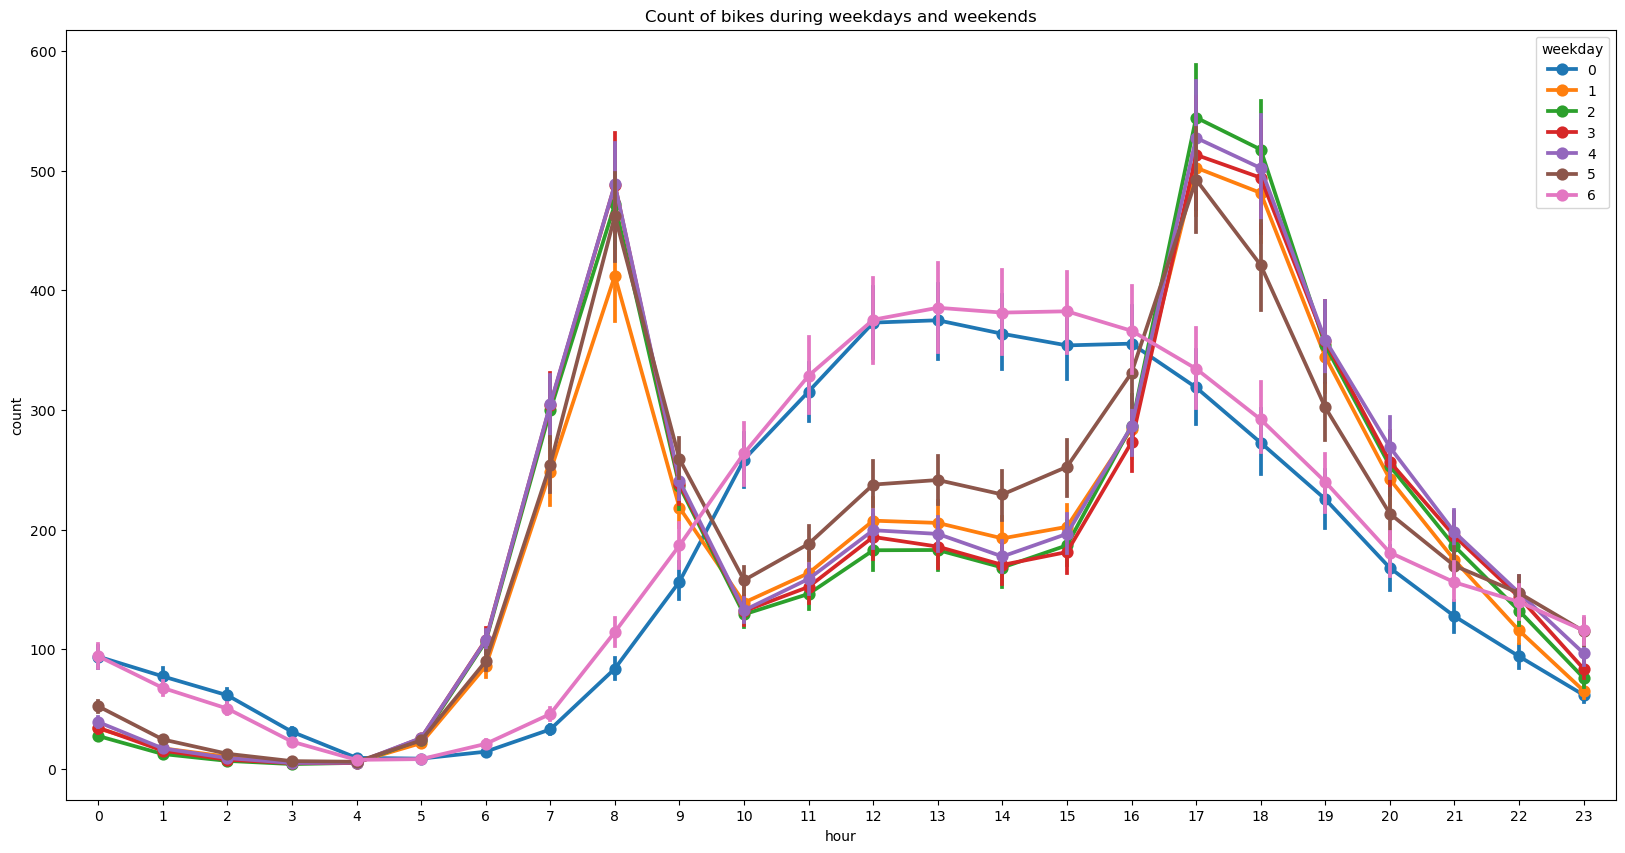

In [11]:
# Create a subplot with specific figure size
fig, ax = plt.subplots(figsize=(20,10))

# Create a point plot using seaborn
# data: The DataFrame containing your data
# x: The column in the DataFrame to use for the x-axis (hours of the day)
# y: The column in the DataFrame to use for the y-axis (count of bikes)
# hue: The column in the DataFrame to use for color encoding (weekdays)
# ax: The Axes object to plot on
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)

# Set the title for the plot
ax.set(title='Count of bikes during weekdays and weekends')


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

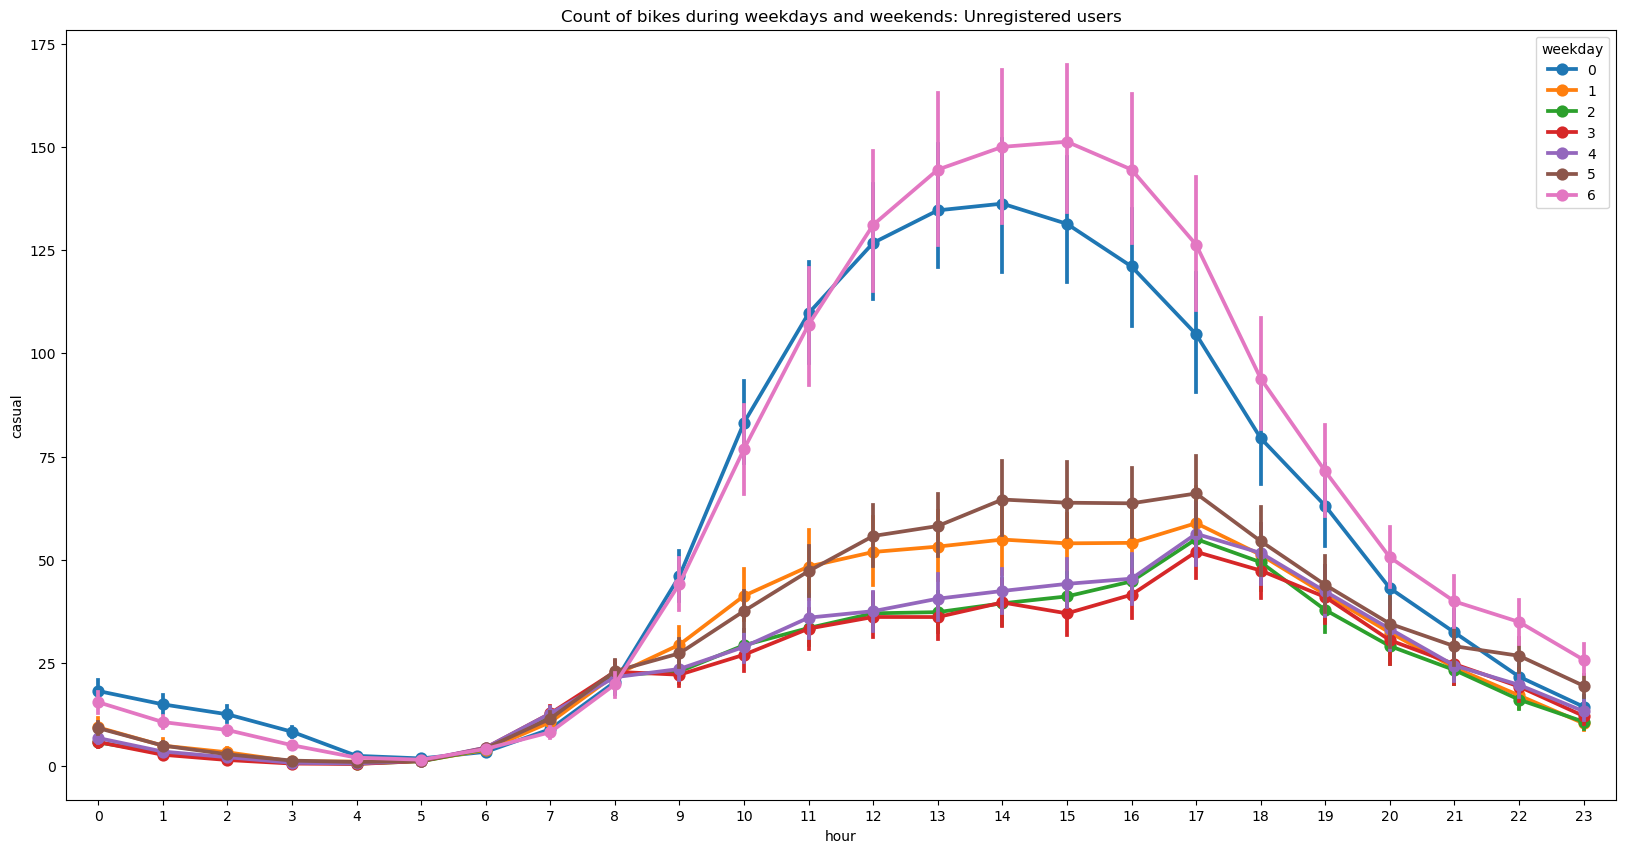

In [14]:
# Create a subplot with specific figure size (width=20, height=10 inches)
fig, ax = plt.subplots(figsize=(20,10))

# Create a point plot using seaborn
# data: The DataFrame containing your data
# x: The column in the DataFrame to use for the x-axis (hours of the day)
# y: The column in the DataFrame to use for the y-axis (count of unregistered bike users)
# hue: The column in the DataFrame to use for color encoding (weekdays)
# ax: The Axes object to plot on
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)

# Set the title for the plot
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

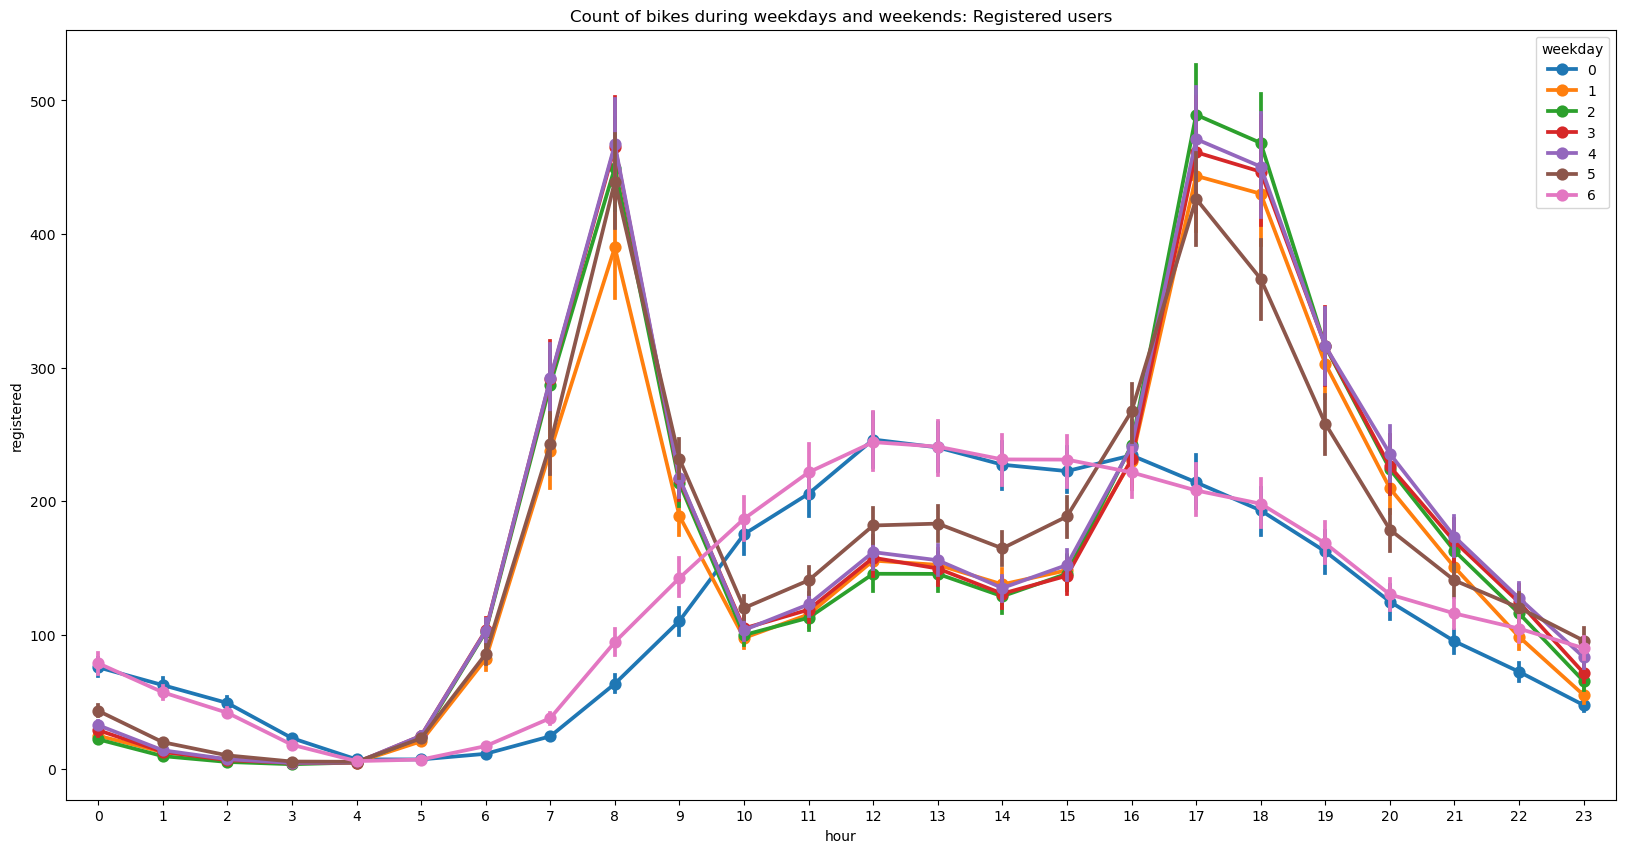

In [12]:
# Create a subplot with specific figure size (width=20, height=10 inches)
fig, ax = plt.subplots(figsize=(20,10))

# Create a point plot using seaborn
# data: The DataFrame containing your data
# x: The column in the DataFrame to use for the x-axis (hours of the day)
# y: The column in the DataFrame to use for the y-axis (count of registered bike users)
# hue: The column in the DataFrame to use for color encoding (weekdays)
# ax: The Axes object to plot on
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)

# Set the title for the plot
ax.set(title='Count of bikes during weekdays and weekends: Registered users')
